<a href="https://colab.research.google.com/github/1900690/heatmap_yolo/blob/main/image-heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[参考:https://github.com/rigvedrs/YOLO-V11-CAM/blob/main/YOLO_v11_EigenCAM.ipynb](https://github.com/rigvedrs/YOLO-V11-CAM/blob/main/YOLO_v11_EigenCAM.ipynb)

In [1]:
#@title 事前準備
!pip -q install ultralytics
!pip -q install ttach
import ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  # Suppress Matplotlib warnings

plt.rcParams["figure.figsize"] = [3.0, 3.0]

!git clone https://github.com/rigvedrs/YOLO-V11-CAM.git

%cd /content/YOLO-V11-CAM
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultra

In [2]:
#@title 画像を取得
import shutil
import os
from PIL import Image

file_name ="kensyou-bud-original.zip"

if os.path.exists('/content/foward'):
    shutil.rmtree("/content/foward")
if os.path.exists('/content/foward_jpg'):
    shutil.rmtree("/content/foward_jpg")
os.makedirs('/content/foward')
os.makedirs('/content/foward_jpg')

#データを解凍
shutil.unpack_archive('/content/'+file_name, '/content/')
os.rename('/content/'+os.path.splitext(file_name)[0]+'/', '/content/foward/')
#zipを消す
os.remove('/content/'+file_name)


files = os.listdir('/content/foward/')
md_files = [i for i in files if i.endswith('.jpg') == True]
if not len(md_files)==0:
 for file in md_files:
    shutil.copy2(os.path.join('/content/foward/', file), '/content/foward_jpg/')
else:
  md_files = [i for i in files if i.endswith('.png') == True]
  for i in md_files:
   im = Image.open('/content/foward/'+i)
   im = im.convert("RGB")
   im.save('/content/foward_jpg/'+i[:-4]+".jpg")

#オブジェクト検出


image 1/43 /content/foward_jpg/050 (2)_0.jpg: 480x640 1 OK, 83.4ms
image 2/43 /content/foward_jpg/052 (2)_0.jpg: 640x512 1 OK, 72.4ms
image 3/43 /content/foward_jpg/055 (2)_0.jpg: 608x640 1 OK, 89.4ms
image 4/43 /content/foward_jpg/056 (1)_0.jpg: 608x640 1 OK, 69.8ms
image 5/43 /content/foward_jpg/056 (2)_0.jpg: 544x640 1 OK, 50.2ms
image 6/43 /content/foward_jpg/061 (1)_0.jpg: 640x640 1 OK, 53.3ms
image 7/43 /content/foward_jpg/063 (1)_0.jpg: 640x544 1 OK, 51.1ms
image 8/43 /content/foward_jpg/064 (1)_0.jpg: 576x640 1 OK, 51.8ms
image 9/43 /content/foward_jpg/064 (2)_0.jpg: 480x640 1 OK, 37.6ms
image 10/43 /content/foward_jpg/064 (3)_0.jpg: 480x640 1 OK, 38.7ms
image 11/43 /content/foward_jpg/066 (2)_0.jpg: 640x512 1 OK, 40.7ms
image 12/43 /content/foward_jpg/067 (1)_0.jpg: 640x576 1 OK, 50.8ms
image 13/43 /content/foward_jpg/067 (2)_0.jpg: 640x576 1 OK, 47.2ms
image 14/43 /content/foward_jpg/067 (3)_0.jpg: 640x608 1 OK, 53.8ms
image 15/43 /content/foward_jpg/068 (2)_0.jpg: 608x640 1

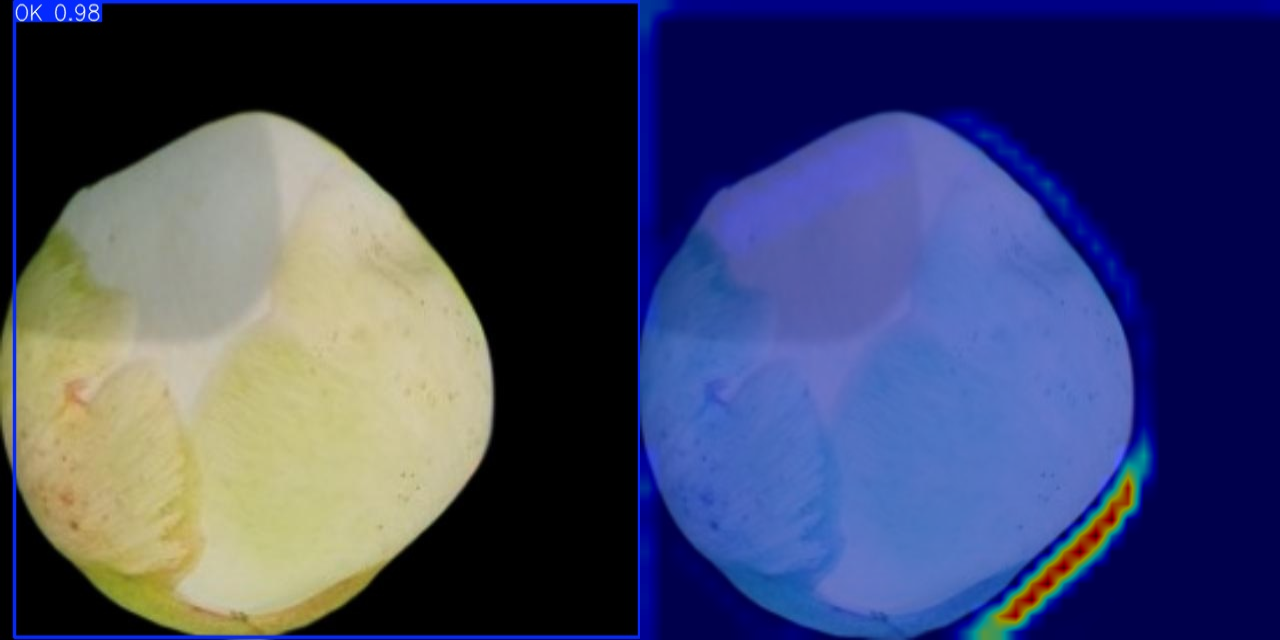

In [3]:
#判定済みと結合
import glob
import os
from ultralytics import YOLO


model = YOLO("/content/bud-obj.pt")
results = model(source="/content/foward_jpg/", save=True, save_conf=True,save_txt=True)


model = YOLO('/content/bud-obj.pt')
model = model.cpu()

if os.path.exists("/content/combi2-obj"):
  shutil.rmtree("/content/combi2-obj")

os.makedirs('/content/combi2-obj')

file_list = sorted(glob.glob('/content/foward_jpg/*.jpg'))

for filename in file_list:
    img = cv2.imread(filename)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    img2 = cv2.imread('/content/YOLO-V11-CAM/runs/detect/predict/'+os.path.basename(filename))
    img2 = cv2.resize(img2, (640, 640))
    rgb_img2 = img2.copy()
    img2 = np.float32(img2) / 255

    target_layers =[model.model.model[-12]]#[model.model.model[-2]]
    cam = EigenCAM(model, target_layers,task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    im2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2BGR)
    #comb_image=Image.fromarray(np.hstack((im, cam_image)))
    comb_image=Image.fromarray(np.hstack((im2, cam_image)))
    comb_image.save("/content/combi2-obj/"+os.path.basename(filename))

im2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im2, cam_image)))

In [ ]:
#@markdown 作ったファイルをダウンロード
import shutil
import os
from google.colab import files

shutil.make_archive('/content/combi2-obj', 'zip', '/content/combi2-obj')

'/content/combi2-obj.zip'

In [7]:
#@title　テキストファイルをCSV一つにまとめる

import csv
import glob

# テキストファイルを開いてCSVファイルに書き込む
def text_csv_converter(datas): # datasはテキストファイルの場所
   # 保存するCSVファイルの場所
   file_csv ='/content/txt_matome.csv'

  # テキストファイルを開く
   with open(datas)as rf:
       # 書き込むＣＳＶファイルを開く
       with open(file_csv, "a")as wf:
           # テキストを１行ずつ読み込む
           # テキストの１行を要素としたlistになる
           readfile = rf.readlines()

           for read_text in readfile:
               # listに分割
               read_text = read_text.split()
               read_text.insert(0,os.path.basename(file_name))
               # csvに書き込む
               writer = csv.writer(wf, delimiter=',')
               writer.writerow(read_text)

if __name__ == '__main__':
   # filenameはテキストファイルの場所
   file_list = sorted(glob.glob('/content/YOLO-V11-CAM/runs/detect/predict/labels/*.txt'))
   with open('/content/txt_matome.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["name","label","x1","y1","x2","y2","conf"])
   for file_name in file_list:
     text_csv_converter(file_name)

#クラス分け

In [10]:
#@title 画像を取得
import shutil
import os
from PIL import Image

file_name ="kensyou-reaf-square.zip"

if os.path.exists('/content/foward'):
    shutil.rmtree("/content/foward")
if os.path.exists('/content/foward_jpg'):
    shutil.rmtree("/content/foward_jpg")
os.makedirs('/content/foward')
os.makedirs('/content/foward_jpg')

#データを解凍
shutil.unpack_archive('/content/'+file_name, '/content/')
os.rename('/content/'+os.path.splitext(file_name)[0]+'/', '/content/foward/')
#zipを消す
os.remove('/content/'+file_name)


files = os.listdir('/content/foward/')
md_files = [i for i in files if i.endswith('.jpg') == True]
if not len(md_files)==0:
 for file in md_files:
    shutil.copy2(os.path.join('/content/foward/', file), '/content/foward_jpg/')
else:
  md_files = [i for i in files if i.endswith('.png') == True]
  for i in md_files:
   im = Image.open('/content/foward/'+i)
   im = im.convert("RGB")
   im.save('/content/foward_jpg/'+i[:-4]+".jpg")

##判定結果と合わせて表示する

100%|██████████| 755k/755k [00:00<00:00, 25.1MB/s]

image 1/43 /content/foward_jpg/050 (2).jpg: 640x640 OK 1.00, NG 0.00, 51.8ms
image 2/43 /content/foward_jpg/052 (2).jpg: 640x640 OK 0.99, NG 0.01, 40.2ms
image 3/43 /content/foward_jpg/055 (2).jpg: 640x640 OK 1.00, NG 0.00, 40.2ms


image 4/43 /content/foward_jpg/056 (1).jpg: 640x640 NG 1.00, OK 0.00, 40.3ms
image 5/43 /content/foward_jpg/056 (2).jpg: 640x640 OK 0.94, NG 0.06, 30.0ms
image 6/43 /content/foward_jpg/061 (1).jpg: 640x640 OK 1.00, NG 0.00, 30.3ms
image 7/43 /content/foward_jpg/063 (1).jpg: 640x640 NG 0.98, OK 0.02, 29.9ms
image 8/43 /content/foward_jpg/064 (1).jpg: 640x640 NG 1.00, OK 0.00, 31.2ms
image 9/43 /content/foward_jpg/064 (2).jpg: 640x640 OK 1.00, NG 0.00, 31.1ms
image 10/43 /content/foward_jpg/064 (3).jpg: 640x640 OK 1.00, NG 0.00, 29.3ms
image 11/43 /content/foward_jpg/066 (2).jpg: 640x640 OK 0.74, NG 0.26, 29.6ms
image 12/43 /content/foward_jpg/067 (1).jpg: 640x640 NG 1.00, OK 0.00, 29.2ms
image 13/43 /content/foward_jpg/067 (2).jpg: 640x640 NG 0.99, OK 0.01, 29.5ms
image 14/43 /content/foward_jpg/067 (3).jpg: 640x640 OK 0.86, NG 0.14, 28.5ms
image 15/43 /content/foward_jpg/068 (2).jpg: 640x640 NG 1.00, OK 0.00, 30.6ms
image 16/43 /content/foward_jpg/069 (2).jpg: 640x640 OK 1.00, NG 0.00,

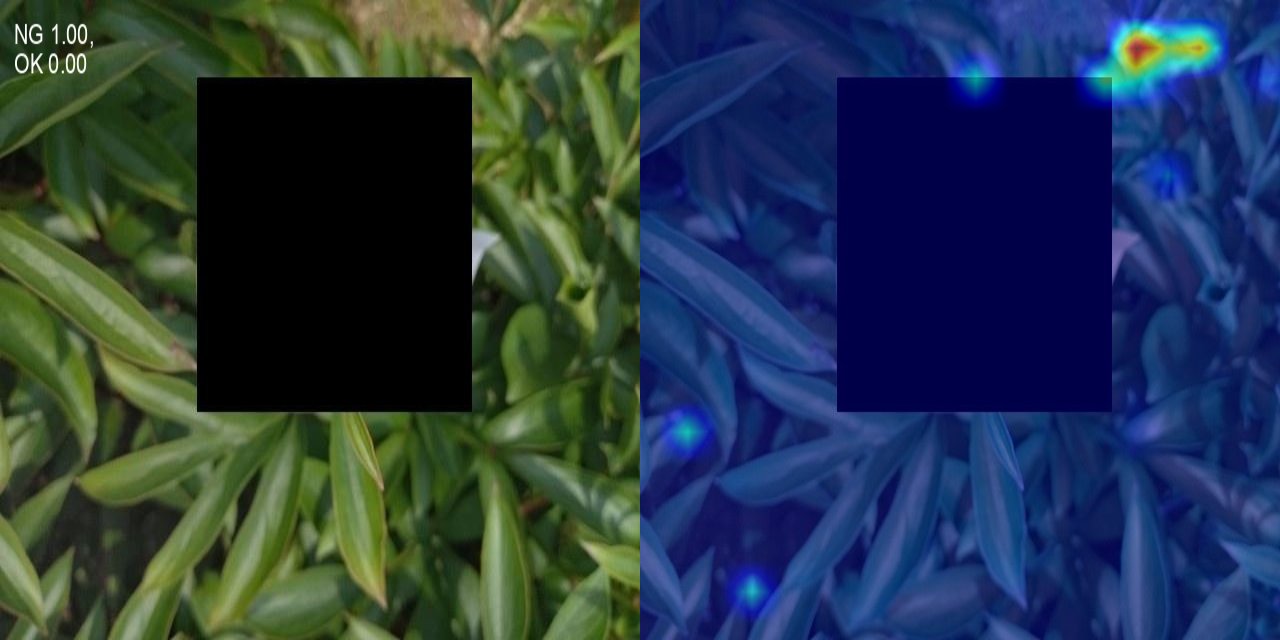

In [11]:
#判定済みと結合
import glob
import os

#判定結果を取得
from ultralytics import YOLO
model = YOLO("/content/reaf-back-square.pt")
results = model(source="/content/foward_jpg/", save=True, save_conf=True)


model = YOLO('/content/reaf-back-square.pt')
model = model.cpu()

if os.path.exists("/content/combi2-cls"):
  shutil.rmtree("/content/combi2-cls")

os.makedirs('/content/combi2-cls')

file_list = sorted(glob.glob('/content/foward_jpg/*.jpg'))

for filename in file_list:
    img = cv2.imread(filename)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    img2 = cv2.imread('/content/YOLO-V11-CAM/runs/classify/predict/'+os.path.basename(filename)[:-4]+".jpg")
    img2 = cv2.resize(img2, (640, 640))
    rgb_img2 = img2.copy()
    img2 = np.float32(img2) / 255

    target_layers =[model.model.model[-2]]#[model.model.model[-2]]
    cam = EigenCAM(model, target_layers,task='cls')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    im2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2BGR)
    #comb_image=Image.fromarray(np.hstack((im, cam_image)))
    comb_image=Image.fromarray(np.hstack((im2, cam_image)))
    comb_image.save("/content/combi2-cls/"+os.path.basename(filename)[:-4]+".jpg")

im2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im2, cam_image)))

In [12]:
#@markdown 作ったファイルをダウンロード
import shutil
import os
from google.colab import files

shutil.make_archive('/content/combi2-cls', 'zip', '/content/combi2-cls')

#ダウンロード
#files.download("/content/datasets.zip")

'/content/combi2-cls.zip'